In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('WFIGS_-_2022_Wildland_Fire_Locations_to_Date.csv', na_values=[''], converters={'FireDiscoveryDateTime': pd.to_datetime})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39530 entries, 0 to 39529
Data columns (total 96 columns):
 #   Column                           Non-Null Count  Dtype              
---  ------                           --------------  -----              
 0   X                                39530 non-null  float64            
 1   Y                                39530 non-null  float64            
 2   OBJECTID                         39530 non-null  int64              
 3   ABCDMisc                         2270 non-null   object             
 4   ADSPermissionState               39530 non-null  object             
 5   CalculatedAcres                  549 non-null    float64            
 6   ContainmentDateTime              24273 non-null  object             
 7   ControlDateTime                  20704 non-null  object             
 8   DailyAcres                       30105 non-null  float64            
 9   DiscoveryAcres                   34824 non-null  float64            
 10

/var/folders/xb/3kyhyk0s6zv0y_tv20yntjcr0000gn/T/ipykernel_47437/2534031542.py:1: DtypeWarning: Columns (14,32,61,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('WFIGS_-_2022_Wildland_Fire_Locations_to_Date.csv', na_values=[''], converters={'FireDiscoveryDateTime': pd.to_datetime})


In [16]:
new_df = df. filter(['FireDiscoveryDateTime', 'IncidentName','DiscoveryAcres', 'IncidentTypeCategory', 'POOCounty', 'POODispatchCenterID'])
CA_df = new_df[new_df['POODispatchCenterID'].str.startswith('CA', na=False)]
CA_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13731 entries, 1 to 39527
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   FireDiscoveryDateTime  13731 non-null  datetime64[ns, UTC]
 1   IncidentName           13731 non-null  object             
 2   DiscoveryAcres         13266 non-null  float64            
 3   IncidentTypeCategory   13731 non-null  object             
 4   POOCounty              13731 non-null  object             
 5   POODispatchCenterID    13731 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), object(4)
memory usage: 750.9+ KB


In [17]:
CA_df['POOCounty'].value_counts()

Riverside         3647
Los Angeles       2822
Fresno             630
San Bernardino     427
Merced             387
                  ... 
Douglas              4
Kauai                3
Jackson              2
Honolulu             1
Carson City          1
Name: POOCounty, Length: 66, dtype: int64

In [9]:
df_historical_data = pd.read_csv('WFIGS_-_Wildland_Fire_Locations_Full_History.csv', na_values=[''], converters={'FireDiscoveryDateTime': pd.to_datetime})
df_historical_data.info()

/var/folders/xb/3kyhyk0s6zv0y_tv20yntjcr0000gn/T/ipykernel_47437/1981588489.py:1: DtypeWarning: Columns (13,14,16,32,61,64,68,69,77,78,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  df_historical_data = pd.read_csv('WFIGS_-_Wildland_Fire_Locations_Full_History.csv', na_values=[''], converters={'FireDiscoveryDateTime': pd.to_datetime})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246580 entries, 0 to 246579
Data columns (total 96 columns):
 #   Column                           Non-Null Count   Dtype              
---  ------                           --------------   -----              
 0   X                                246580 non-null  float64            
 1   Y                                246580 non-null  float64            
 2   OBJECTID                         246580 non-null  int64              
 3   ABCDMisc                         12940 non-null   object             
 4   ADSPermissionState               246580 non-null  object             
 5   CalculatedAcres                  5349 non-null    float64            
 6   ContainmentDateTime              149988 non-null  object             
 7   ControlDateTime                  135647 non-null  object             
 8   DailyAcres                       171896 non-null  float64            
 9   DiscoveryAcres                   182417 non-null  float64  

In [13]:
new_his_df = df_historical_data. filter(['FireDiscoveryDateTime', 'DiscoveryAcres','IncidentName', 'IncidentTypeCategory', 'POOCounty', 'POODispatchCenterID'])
CA_his_df = new_his_df[new_his_df['POODispatchCenterID'].str.startswith('CA', na=False)]
CA_his_df.head()

,FireDiscoveryDateTime,DiscoveryAcres,IncidentName,IncidentTypeCategory,POOCounty,POODispatchCenterID
1,2020-02-28 20:45:40+00:00,0.1,LAC-066100,WF,Los Angeles,CALACC
3,2019-07-01 19:54:00+00:00,NaN,SYCAMORE,WF,San Diego,CAMVIC
23,2020-08-15 18:31:58+00:00,0.1,SOUTH FORK,WF,Siskiyou,CAYICC
41,2019-09-05 16:39:50+00:00,0.1,MARTIN 2,WF,Siskiyou,CAYICC
42,2020-05-06 19:10:01+00:00,0.1,CAVE,WF,Calaveras,CATCCC


In [14]:
CA_his_df['POOCounty'].value_counts()

Los Angeles       14034
Riverside          6937
San Bernardino     1630
Fresno             1511
San Diego          1339
                  ...  
Kauai                 3
Carson City           2
Curry                 1
Klamath               1
Esmeralda             1
Name: POOCounty, Length: 71, dtype: int64

In [30]:
df_fires = pd.concat((CA_his_df, CA_df), axis=0,ignore_index=True)
df_fires['POOCounty'].value_counts()

Los Angeles       16856
Riverside         10584
Fresno             2141
San Bernardino     2057
Shasta             1669
                  ...  
Carson City           3
Maui                  3
Curry                 1
Klamath               1
Esmeralda             1
Name: POOCounty, Length: 71, dtype: int64

In [31]:
df_fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61305 entries, 0 to 61304
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   FireDiscoveryDateTime  61305 non-null  datetime64[ns, UTC]
 1   DiscoveryAcres         56443 non-null  float64            
 2   IncidentName           61305 non-null  object             
 3   IncidentTypeCategory   61305 non-null  object             
 4   POOCounty              61305 non-null  object             
 5   POODispatchCenterID    61305 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), object(4)
memory usage: 2.8+ MB


In [45]:
df_LA_RS_fires = df_fires[df_fires['POOCounty'].isin(['Los Angeles', 'Riverside'])]
df_LA_RS_fires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27440 entries, 0 to 61304
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   FireDiscoveryDateTime  27440 non-null  datetime64[ns, UTC]
 1   DiscoveryAcres         27109 non-null  float64            
 2   IncidentName           27440 non-null  object             
 3   IncidentTypeCategory   27440 non-null  object             
 4   POOCounty              27440 non-null  object             
 5   POODispatchCenterID    27440 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), object(4)
memory usage: 1.5+ MB


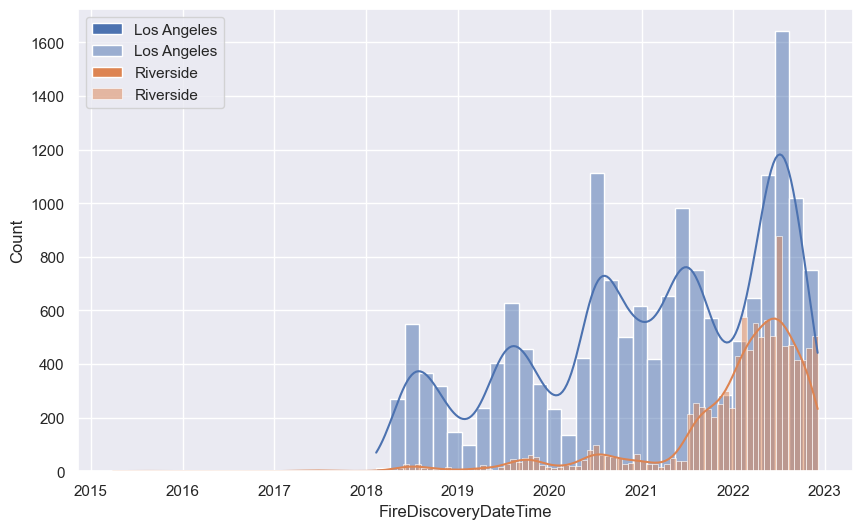

In [67]:
fig = plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
df_LA_fires = df_LA_RS_fires[df_LA_RS_fires.POOCounty == 'Los Angeles']
df_RS_fires = df_LA_RS_fires[df_LA_RS_fires.POOCounty == 'Riverside']
sns.histplot(df_LA_fires["FireDiscoveryDateTime"], label = 'Los Angeles', kde=True)
sns.histplot(df_RS_fires["FireDiscoveryDateTime"], label = 'Riverside', kde=True)
plt.legend() 

In [44]:
df_LA_RS_fires['FireDiscoveryDateTime'].max()

Timestamp('2022-12-02 22:26:11+0000', tz='UTC')

In [41]:
df_LA_RS_fires = df_LA_RS_fires[df_LA_RS_fires.DiscoveryAcres < 5000]
df_LA_RS_fires['DiscoveryAcres'].max()


800.0